#### This notebook performs task 2.3 of CRISP-DM on our King County housing dataset

At the end, sadly, it includes some things that should not be here, but rather in other tasks. This was a bad design choice.

In [1]:
# Things to plot
#   1. 2 or 3 distributions of some simple relationships,
#      just to give a taste of the data.
#   2. Factor SVD to find out how the data is distributed
#   3. Measure to what extent the data is randomly clusterable
# Won't use seaborn

In [2]:
from pysrc.cdm23 import *
setMplParams()

#### 1. Plot simple distributions

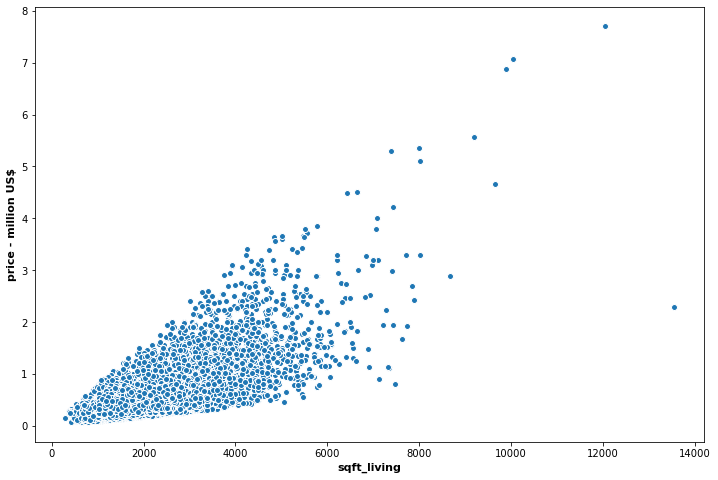

In [3]:
# Plot relation sqft_living X price
plotLivPrice()

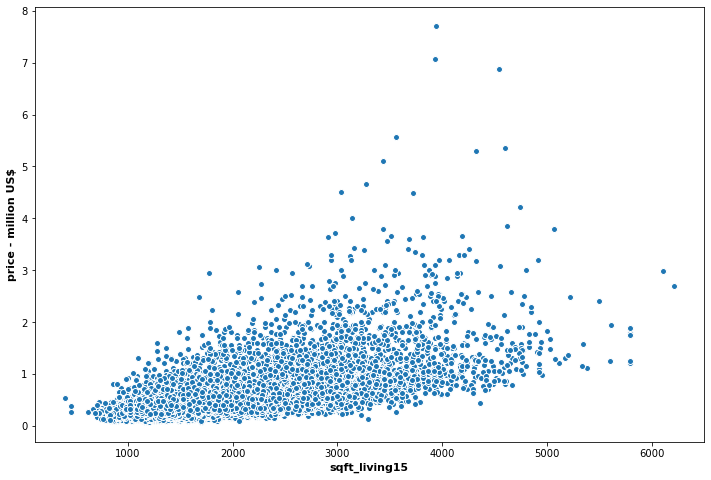

In [4]:
plotLiv15Price()

In [5]:
# Categorical attribute waterfront and its effect on "price"
# Measures shown with one standard deviation error
showWaterFront()

Price without waterfront: [189964 873163]
Price with waterfront: [ 541504 2782247]


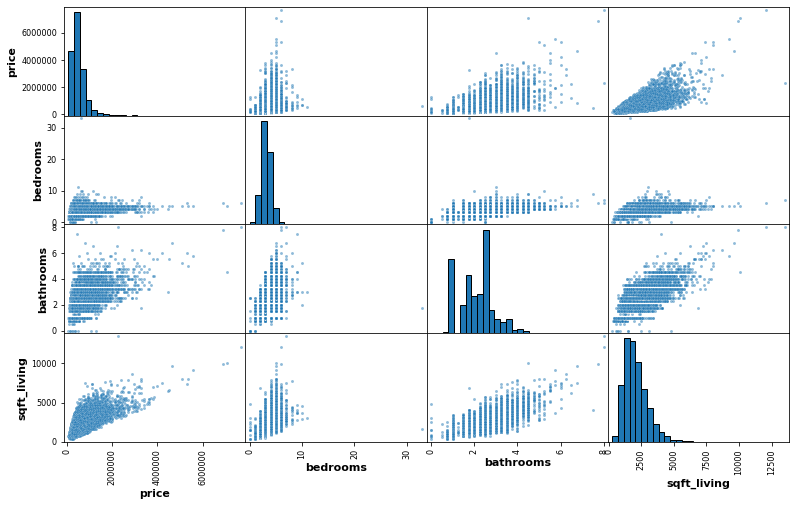

In [6]:
# Scatter matrix to show how the attributes are multimodal
plotScatterMatrix(df)

#### 2. Factor SVD to find out how the data is distributed

In [7]:
# Maybe this reinforces the reasoning on choosing Min-Max technique
chosenSigmas = chooseBiggestSigmas()
print(f"Chosen sigmas: {chosenSigmas}")

Chosen sigmas: [96048610.09967676  6911841.93777223]


#### 3. Test clustering null hypothesis (Gap statistic)

In [8]:
# Is this worth doing?
# - What information is it going to give me?
# - How does that information help me achieve my data mining objective?
# What are the steps required?
# - Finish preprocessing the data (CHECK)
# - Find out how to build the gap statistic
#
# Ok. I think I know how to build the gap statistic
#
# 1. I fix the number of samples "t"
#
# 2. I have to generate samples of the dataset following the
#    Monte Carlo sampling methodology.
#
# 3. I then run K-means on each sample like 100 times, to find
#    out the best clustering for that sample.
#
# 4. Build the W similarity matrix for each cluster (1..K).
#    Calculate the W_in coefficient, which is just the sum of
#    all the values of that matrix. (should end up with 3 
#    nested loops for this part)
#
# 5. Get the mean "mu" and standard deviation of the W_in's
#
# 6. The gap statistic for K is then given as
#    gap(K) = mu - log(W_in(original dataset))
#
# It measures the difference between the null hypothesis and
#   our clustering on the original dataset, for K clusters.

In [9]:
# Reduced dimensionality data frame to remove redundancies
reDf = buildReDf(chosenSigmas)

In [10]:
# Normalize the data according to Min-Max technique
normalize(reDf)
reDf

,pc0,pc1
0,-222053.234082,1402.042451
1,-538095.563991,-5248.543437
2,-180314.423215,7572.539957
3,-603962.784988,-10403.226058
4,-510120.158527,-3796.175286
...,...,...
21608,-359919.143408,-8521.810709
21609,-400115.695465,-2760.475185
21610,-402011.279515,-9293.285924
21611,-399925.911066,-8687.613889


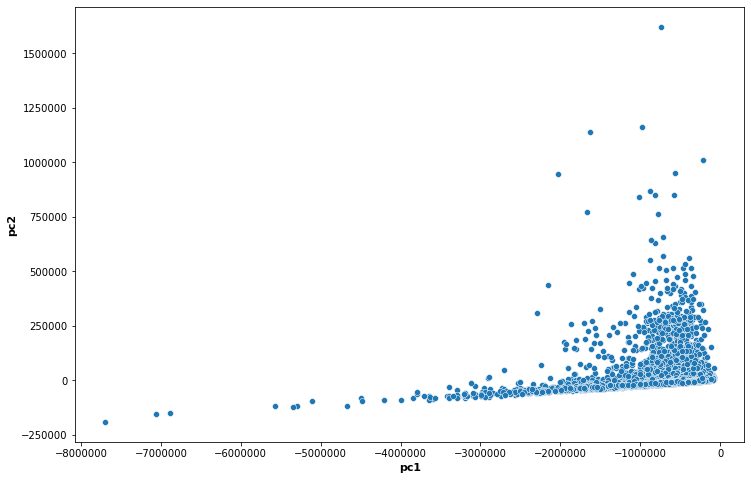

In [11]:
plotReDf(reDf)

In [12]:
# Computes vector of gap statistics
gaps, gapSigmas = computeGaps(df=reDf, nIter=9, t=5)


Calculated gap statistic:  1.3751598919441008

Calculated gap statistic:  1.5095008023629326

Calculated gap statistic:  1.3858559326819844

Calculated gap statistic:  1.6672397251452722

Calculated gap statistic:  1.4274161020101879

Calculated gap statistic:  1.5927523995392647

Calculated gap statistic:  1.671293520272588

Calculated gap statistic:  1.4969522666376562

Calculated gap statistic:  1.558344756730687


#### Step 1

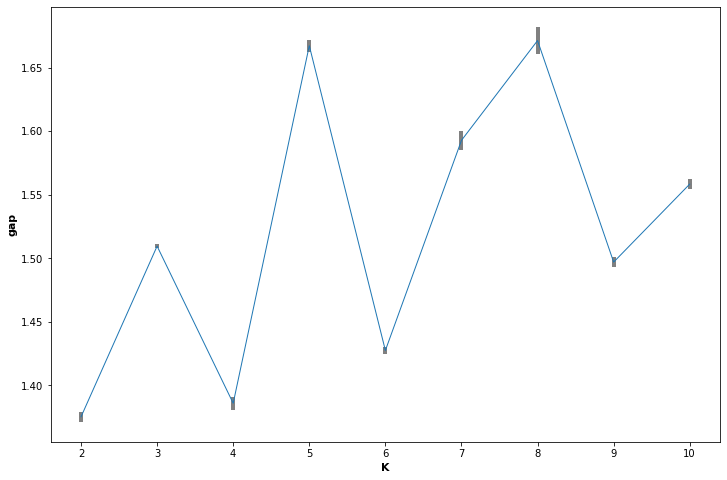

In [13]:
plotGapsDist(gaps, gapSigmas)

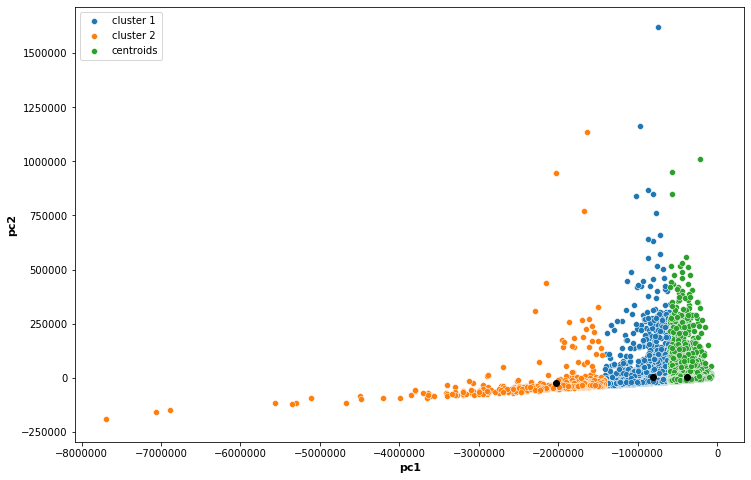

In [14]:
# Plot the grouping on the reduced dimension
# dataframe, for optimal K
optimalK = 3
plotClustering2d(reDf, optimalK)

In [15]:
# Fit original dataset with optimalK clusters

kmeansFit = runKmeans(df.values, optimalK)

In [16]:
# Gave up on this objective...
#
# Decide and use an internal cluster
#   measure, other than the gap statistic,
#   to measure the quality of the clustering
#   obtained.
#
# Options: C-Index, Dunn Index

In [17]:
# How to compute the C-index?
#
# 1. Choose a number of distances "N_in" to be compared
#
# 2. Compute similarity matrix W
#
# 3. Compute weights W_in(already have method for that)
#
# 4. Return their mean
"""
def getKMin(dataMatrix, K):
    mins = np.zeros(K)
    for i in range(K):
        minIndex = dataMatrix.argmin()
        mins[i] = dataMatrix[]
def cIndex(dataMatrix, KMeansModel):
    clusters = mapClusterDict(dataMatrix, KMeansModel.labels_)
    
    # Build W_in for each cluster
    numClusters = len(clusters.keys())
    cIndexes = np.zeros(numClusters)
    for k in range(numClusters):
        W_in = buildW_in(clusters, k)
        N_in = len(clusters[k])
        
        W_min = W_flat_sort[:N_in].sum()
        W_max = W_flat_sort[-N_in:].sum()
        
        print("W_in\n", W_in)
        print("N_in: ", N_in)
        print("W_min\n", W_min)
        print("W_max\n", W_max)
        
        cIndexes[k] = (W_in - W_min) / (W_max - W_min)
        
    return cIndexex.mean()
    
CI = cIndex(df.values, kmeansFit)
CI
""";